importamos las bibliotecas

In [843]:
import torch
import torch.nn as nn
import torch.nn.functional as F


creamos una clase modelo que herede el nn.modulo

In [844]:
class Model(nn.Module):
    # capa de entrada que tiene 23 caracteristicas --> 
    # capa oculta1 con n neuronas  --> 
    # capa oculta2 con n neuronas --> 
    # capa de salida con 1 neurona y 2 clases de respuesta
    def __init__(self, in_entradas=23, h1=30, h2=16, out_salidas=2):
        super(Model, self).__init__()
        # Definimos las capas lineales
        self.fc1 = nn.Linear(in_entradas, h1)  # Capa de entrada a capa oculta 1
        self.fc2 = nn.Linear(h1, h2)            # Capa oculta 1 a capa oculta 2
        self.out = nn.Linear(h2, out_salidas)   # Capa oculta 2 a capa de salida

    def adelante(self, x):
        # función de activación ReLU para las capas ocultas
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # función de activación softmax para la capa de salida
        x = self.out(x)

        return x
    

elegimos una semilla manualmente para poder elegir un numero aleatoriamente e instanciamos el modelo 

In [845]:
torch.manual_seed(5)  # Elegimos una semilla manualmente para poder elegir un numero aleatoriamente

model = Model()

importamos matplotlib

In [846]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

importamos el dataset 

In [847]:
my_data = pd.read_csv('clientes_sin_id.csv', sep=';')


In [848]:
#revisamos los datos
my_data

,90000,2,2.1,2.2,34,0,0.1,0.2,0.3,0.4,...,14331,14948,15549,1518,1500,1000,1000.1,1000.2,5000,0.6
0,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
1,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
2,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
3,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
4,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29993,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29994,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29995,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [849]:
X = my_data.drop('0.6', axis=1)
y = my_data['0.6']

convertimos a arreglos de numpy 

In [850]:
X = X.values
y = y.values



In [851]:
from sklearn.model_selection import train_test_split

In [852]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=5)

In [853]:
#convertimos a tensores de pytorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

In [854]:
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [855]:
#fijar el criterio de perdida y cuan lejos estamos de la respuesta correcta

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [856]:
#entrenamos el modelo 
epochs = 1000
losses = []
for i in range(epochs):
    # pasamos los datos por el modelo
    y_pred = model.adelante(X_train)

    # Computamos y mostramos la pérdida
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if (i+1) % 10 == 0:
        print(f'Epoch {i+1}/{epochs}, Loss: {loss}')
    # Hacemos el backward pass y optimizamos
    optimizer.zero_grad()  # Zero gradients, else they will accumulate between epochs
    loss.backward()        # Backpropagation, compute gradients
    optimizer.step()       # actualizamos los pesos

Epoch 10/1000, Loss: 0.5692400932312012
Epoch 20/1000, Loss: 0.5341082215309143
Epoch 30/1000, Loss: 0.5408948063850403
Epoch 40/1000, Loss: 0.5291147232055664
Epoch 50/1000, Loss: 0.5292728543281555
Epoch 60/1000, Loss: 0.5285596251487732
Epoch 70/1000, Loss: 0.5283145308494568
Epoch 80/1000, Loss: 0.5282852649688721
Epoch 90/1000, Loss: 0.5282403230667114
Epoch 100/1000, Loss: 0.5282366275787354
Epoch 110/1000, Loss: 0.5282324552536011
Epoch 120/1000, Loss: 0.5282309055328369
Epoch 130/1000, Loss: 0.5282309055328369
Epoch 140/1000, Loss: 0.5282305479049683
Epoch 150/1000, Loss: 0.528230607509613
Epoch 160/1000, Loss: 0.5282304883003235
Epoch 170/1000, Loss: 0.5282305479049683
Epoch 180/1000, Loss: 0.5282304883003235
Epoch 190/1000, Loss: 0.5282304883003235
Epoch 200/1000, Loss: 0.5282304883003235
Epoch 210/1000, Loss: 0.5282305479049683
Epoch 220/1000, Loss: 0.5282304883003235
Epoch 230/1000, Loss: 0.5282305479049683
Epoch 240/1000, Loss: 0.5282303690910339
Epoch 250/1000, Loss: 0.52

Text(0.5, 0, 'Epoch')

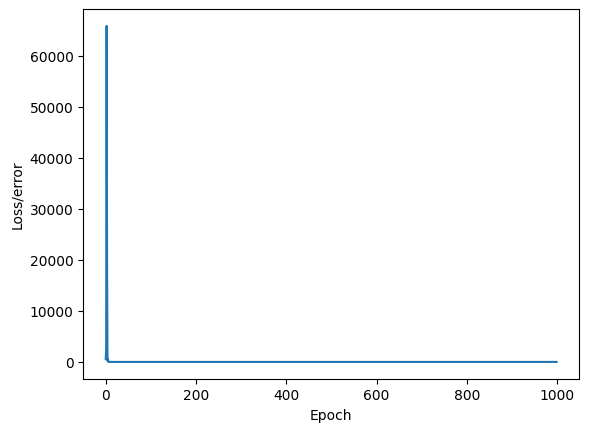

In [857]:
#lo graficamos 
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

evaluamos el modelo en el set de prueba 

In [858]:
with torch.no_grad():
    #evaluamos el modelo en el set de prueba 
    y_eval = model.adelante(X_test)
    loss = criterion(y_eval, y_test)
    
    

In [859]:
loss

tensor(0.5353)

In [860]:
correctos = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.adelante(data)
        
        #nos va a decir la clase con mayor probabilidad
        print(f'{i+1}.) {str(y_val)  }\t \t  {y_test[i]}\t {y_val.argmax().item()}' )

        #averiguamos si es correcto o no
        if y_val.argmax().item() == y_test[i]:
            correctos += 1

print(f'El modelo tuvo {correctos} predicciones correctas de {len(y_test)} lo cual nos da un {(correctos/len(y_test))*100}% de efectividad')




1.) tensor([ 0.5742, -0.6853])	 	  0	 0
2.) tensor([ 0.5742, -0.6853])	 	  0	 0
3.) tensor([ 0.5742, -0.6853])	 	  1	 0
4.) tensor([ 0.5742, -0.6853])	 	  0	 0
5.) tensor([ 0.5742, -0.6853])	 	  0	 0
6.) tensor([ 0.5742, -0.6853])	 	  0	 0
7.) tensor([ 0.5742, -0.6853])	 	  0	 0
8.) tensor([ 0.5742, -0.6853])	 	  0	 0
9.) tensor([ 0.5742, -0.6853])	 	  0	 0
10.) tensor([ 0.5742, -0.6853])	 	  0	 0
11.) tensor([ 0.5742, -0.6853])	 	  0	 0
12.) tensor([ 0.5742, -0.6853])	 	  0	 0
13.) tensor([ 0.5742, -0.6853])	 	  0	 0
14.) tensor([ 0.5742, -0.6853])	 	  0	 0
15.) tensor([ 0.5742, -0.6853])	 	  0	 0
16.) tensor([ 0.5742, -0.6853])	 	  1	 0
17.) tensor([ 0.5742, -0.6853])	 	  0	 0
18.) tensor([ 0.5742, -0.6853])	 	  0	 0
19.) tensor([ 0.5742, -0.6853])	 	  0	 0
20.) tensor([ 0.5742, -0.6853])	 	  1	 0
21.) tensor([ 0.5742, -0.6853])	 	  0	 0
22.) tensor([ 0.5742, -0.6853])	 	  1	 0
23.) tensor([ 0.5742, -0.6853])	 	  0	 0
24.) tensor([ 0.5742, -0.6853])	 	  0	 0
25.) tensor([ 0.5742, -0.